# Pre-Requisite Information
## Objective
Predict future price of apple stock
## Timeframe: 
2000 - 2022
## Jargon: 
x variables: features
y variable: target
## Misc Notes
- Target is continuous and discrete
- What is being considered as target
- What is margin of error for cont
- Explore the random walk hypothesis
- <span style="color:red"> Does YFinance provide price in real terms </span>

## Misc Questions
- <span style="color:red"> In what time frame should I consider data? </span>
    - <span style="color:red"> Would considering multiple timeframes be useful? If yes how would this work in practice </span>

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Feature Selection Technique
- <span style="color:red"> Should Feature Selection Occur before or after data cleaning? </span>
    - I feel that it should occur before cleaning as I would need to "clean" the new features as well.
    - If it does occur after data cleaning I am unsure of how features will also be cleaned Or are features not cleaned
    - Lasso
    - Price of AAPL upto last month
    - Predicting up till a month


# Features 
- <span style="color:red"> Does it make sense to select other stock tickers that may be closely related to AAPL?</span>

### Basic Features
### Technical Indicators
### Fundamental Indicators



# Dataset Creation

In [200]:
aapl

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-06-02 00:00:00-04:00,0.708650,0.754003,0.672744,0.699673,792848000,0.690224,0
2000-06-05 00:00:00-04:00,0.705342,0.719987,0.677941,0.690224,323668800,0.702035,1
2000-06-06 00:00:00-04:00,0.695185,0.731326,0.682666,0.702035,525481600,0.729908,1
2000-06-07 00:00:00-04:00,0.707705,0.733215,0.692586,0.729908,337019200,0.716680,0
2000-06-08 00:00:00-04:00,0.737940,0.744554,0.703925,0.716680,238526400,0.723767,1
...,...,...,...,...,...,...,...
2024-03-27 00:00:00-04:00,170.410004,173.600006,170.110001,173.309998,60273300,171.479996,0
2024-03-28 00:00:00-04:00,171.750000,172.229996,170.509995,171.479996,65672700,170.029999,0
2024-04-01 00:00:00-04:00,171.190002,171.250000,169.479996,170.029999,46240500,168.839996,0


In [105]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state=1)

In [106]:
def predict(train, test, preditors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [111]:
def backtest(data, model, predictors, start=1000, step=250):

    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0,i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictors = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
predictions = backtest(aapl, model, new_predictors)

IndexError: index 1000 is out of bounds for axis 0 with size 17

# Data Cleaning
- Trend Removal --> Analysis 
- Making it Stationary --> Analysis
- Normalizing Data --> Analysis
- Replacing Outliers
- Data Smoothing

### My understanding of Data Cleaning
<span style="color:red">
    
My original Data before feature selection: 
$$[x_1, x_2, x_3] $$ 
I then perform data cleaning

After data cleaning I identify $$ x_4, x_5 $$. But wouldnt they be "not cleaned"

</span>

- <span style="color:red">Do I need to perform data smoothing? </span>
    - I am unsure about whether or not I would need data smoothing, resouirces online suggest I "might" need it but do not explain how to know if I do need it
 
- <span style="color:red">Which features need to be considered for data cleaning</span>
    - From my understanding Each feature would need to be looked at? Is this true and if so do I need to actually plot each feature or can I go with the assumption that I will need to perform data cleaning

# Data Splitting
- <span style="color:red">  How should the dataset be split? </span>

# Links
- Stationary and Outlier removal: https://medium.com/analytics-vidhya/cleaning-and-understanding-multivariate-time-series-data-6554eefbda9c
- Cleaning Time Series Data Guide: https://mlpills.dev/time-series/clean-your-time-series-data-i/ 
- Smoothing techniques based on presence of trend and seasonality: https://medium.com/@srv96/smoothing-techniques-for-time-series-data-91cccfd008a2
- In-Depth Feature Selection Guide: https://medium.com/@pande.ad/data-cleaning-feature-selection-model-interpretability-64f69fd6e155
- Feature Engineering for Stock Market Data: https://medium.com/aimonks/improving-stock-price-forecasting-by-feature-engineering-8a5d0be2be96

In [3]:
data = yf.Ticker("aapl")
data = data.history(start="2020-06-02", end="2024-06-07")
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_100'] = data['Close'].rolling(window=100).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Volatility Indicators
data['std_20'] = data['Close'].rolling(window=20).std()

# Calculate Technical Indicators
delta = data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))
# Calculate lagged values
data['Close_lag1'] = data['Close'].shift(1)
data['Close_lag2'] = data['Close'].shift(5)

data.head(15)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,SMA_100,SMA_200,std_20,RSI,Close_lag1,Close_lag2
Date,,,,,,,,,,,,,,
2020-06-02 00:00:00-04:00,78.418543,79.076208,77.973578,79.051758,87642800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-03 00:00:00-04:00,79.374493,79.751002,78.797504,79.486954,104491200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,79.051758,NaN
2020-06-04 00:00:00-04:00,79.308477,79.609188,78.425882,78.802391,87560400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,79.486954,NaN
2020-06-05 00:00:00-04:00,79.054210,81.107882,79.024873,81.046761,137250400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,78.802391,NaN
2020-06-08 00:00:00-04:00,80.741145,81.560171,80.024806,81.525940,95654400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,81.046761,NaN
2020-06-09 00:00:00-04:00,81.203232,84.496437,81.171448,84.100372,147712400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,81.525940,79.051758
2020-06-10 00:00:00-04:00,85.056327,86.735938,84.613810,86.264084,166651600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,84.100372,79.486954
2020-06-11 00:00:00-04:00,85.401034,85.828883,82.019810,82.122490,201662400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,86.264084,78.802391
2020-06-12 00:00:00-04:00,84.278828,85.031838,81.711737,82.831474,200146000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,82.122490,81.046761


In [ ]:
#Sharpe ratio > 3
#Cumulative correlation 


In [210]:
import statsmodels as sm


X = df[['Volume', 'High', 'Low']]  # Features
y = df['Close']  # Target variable

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

AttributeError: module 'statsmodels' has no attribute 'add_constant'

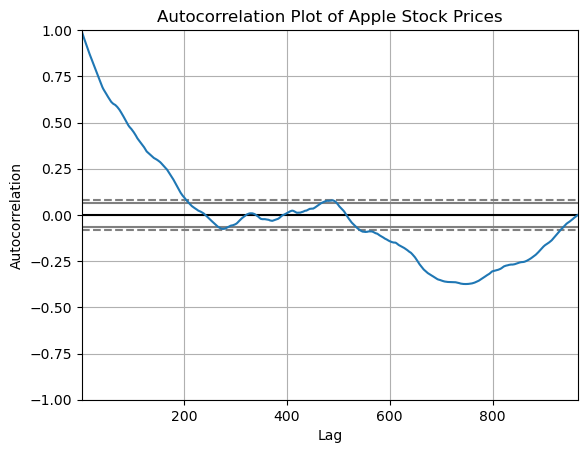

In [188]:
close_prices = data['Close']

# Calculate autocorrelation using pandas autocorr() function
autocorr_values = close_prices.autocorr()

# Plot autocorrelation function (ACF)
pd.plotting.autocorrelation_plot(close_prices)
plt.title('Autocorrelation Plot of Apple Stock Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Axes: xlabel='Date'>

<Figure size 10000x6000 with 0 Axes>

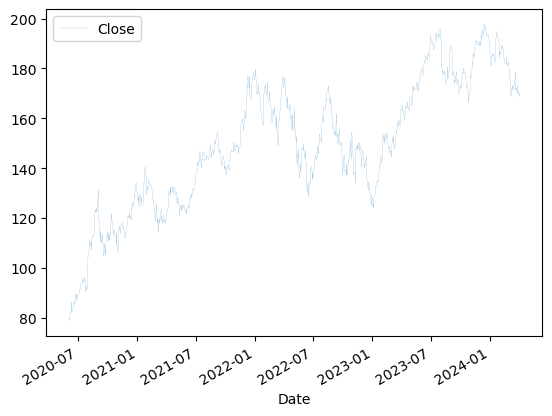

In [158]:
plt.figure(figsize=(100, 60))
df.plot.line(y="Close", use_index=True, linewidth=0.1)

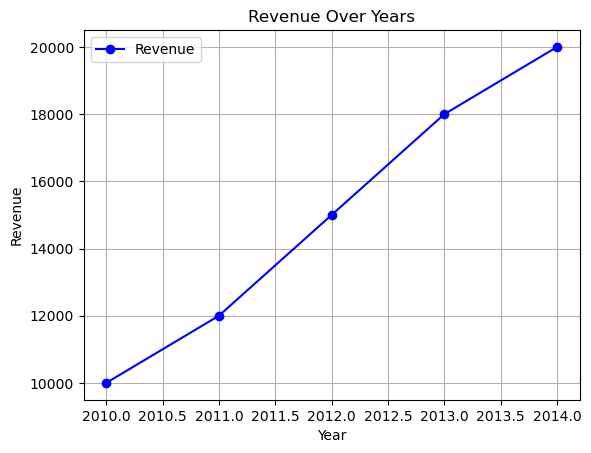

In [117]:

# Sample data
data = {'Year': [2010, 2011, 2012, 2013, 2014],
        'Revenue': [10000, 12000, 15000, 18000, 20000]}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the line graph
df.plot(x='Year', y='Revenue', marker='o', color='b', linestyle='-')

# Add labels and title
plt.title('Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue')

# Show the plot
plt.grid(True)
plt.show()